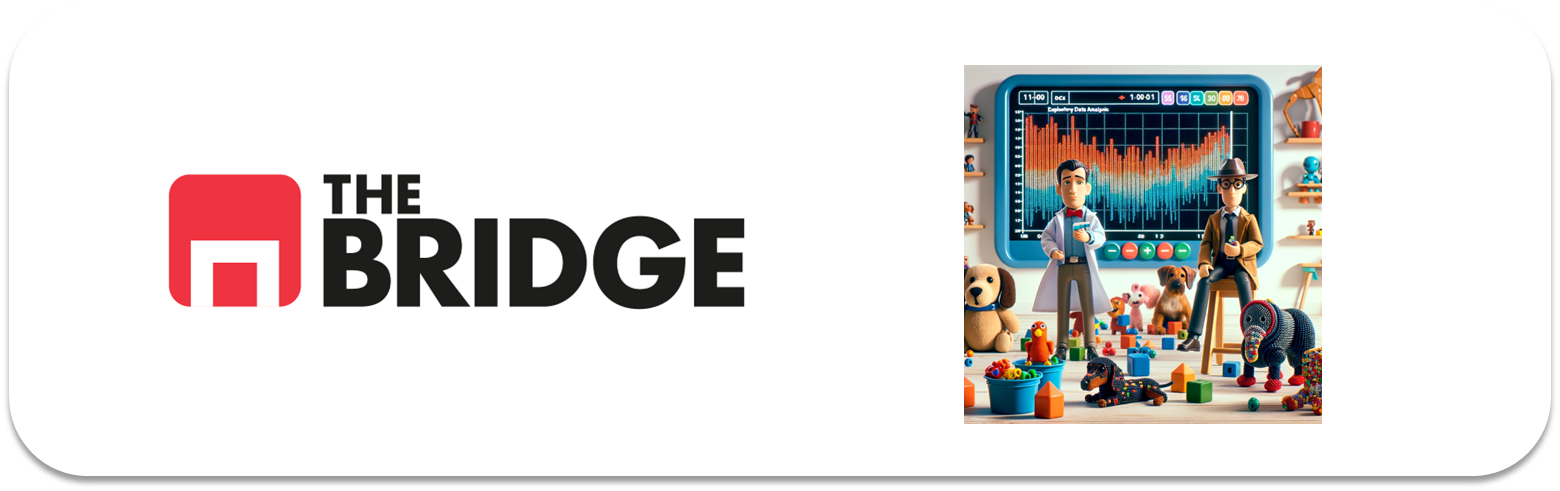

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

Categorica-categoriac: Chi-2

Categoriaca-numerica

- binaria Prueba Umann t student
- no binaria ANOVA

numerica-numerica: Correlacion de pearson

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot

from scipy.stats import chi2_contingency

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [4]:
df_titanic = pd.read_csv("./data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [5]:
df_titanic = df_titanic.drop("deck",axis=1)
df_titanic = df_titanic.drop("survived",axis=1)
df_titanic = df_titanic.drop("embarked",axis=1)
df_titanic = df_titanic.drop("pclass",axis=1)
df_titanic.columns




Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male',
       'embark_town', 'alive', 'alone'],
      dtype='object')

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [6]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
df_titanic = df_titanic.drop("parch",axis=1)
df_titanic = df_titanic.drop("sibsp",axis=1)
df_titanic

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [7]:
moda = df_titanic["embark_town"].mode()
df_titanic["embark_town"] = df_titanic["embark_town"].fillna(moda)

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [8]:
edad_hombres = df_titanic[df_titanic["who"] == "man"]["age"].mean()
edad_mujeres = df_titanic[df_titanic["who"] == "woman"]["age"].mean()
edad_niños = df_titanic[df_titanic["who"] == "child"]["age"].mean()

df_titanic.loc[df_titanic["who"] == "man", "age"] = df_titanic.loc[df_titanic["who"] == "man", "age"].fillna(edad_hombres)
df_titanic.loc[df_titanic["who"] == "woman", "age"] = df_titanic.loc[df_titanic["who"] == "woman", "age"].fillna(edad_mujeres)
df_titanic.loc[df_titanic["who"] == "child", "age"] = df_titanic.loc[df_titanic["who"] == "child", "age"].fillna(edad_niños)

In [9]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     889 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [10]:
df_titanic.columns

Index(['sex', 'age', 'fare', 'class', 'who', 'adult_male', 'embark_town',
       'alive', 'alone', 'family_members'],
      dtype='object')

In [11]:
# En términos absolutos

hombres_supervivientes = df_titanic[(df_titanic["who"] == "man") & (df_titanic["alive"] == "yes")].shape[0]
mujeres_supervivientes = df_titanic[(df_titanic["who"] == "woman") & (df_titanic["alive"] == "yes")].shape[0]
niños_supervivientes = df_titanic[(df_titanic["who"] == "child") & (df_titanic["alive"] == "yes")].shape[0]

print(f"Sobrevivieron {hombres_supervivientes} hombres")
print(f"Sobrevivieron {mujeres_supervivientes} mujeres")
print(f"Sobrevivieron {niños_supervivientes} niños")

Sobrevivieron 88 hombres
Sobrevivieron 205 mujeres
Sobrevivieron 49 niños


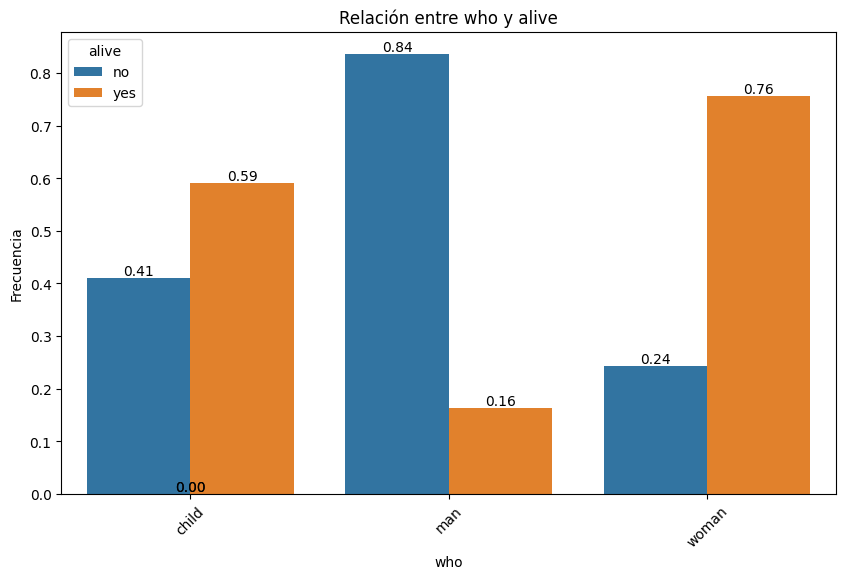

In [12]:
plot_categorical_relationship_fin(df_titanic,"who","alive", relative_freq= True, show_values= True)

In [13]:
tabla_contingencia = pd.crosstab(df_titanic['who'], df_titanic['alive'])

tabla_contingencia


alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


In [14]:

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414  31.85858586]
 [330.87878788 206.12121212]
 [166.97979798 104.02020202]]


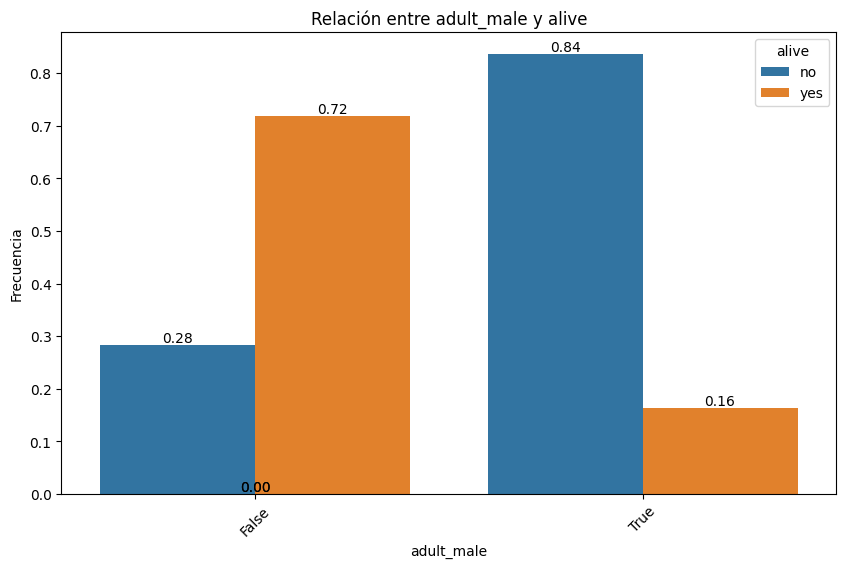

In [15]:
plot_categorical_relationship_fin(df_titanic,"adult_male","alive", relative_freq= True, show_values= True)

In [16]:
tabla_contingencia = pd.crosstab(df_titanic['adult_male'], df_titanic['alive'])

tabla_contingencia


alive,no,yes
adult_male,,
False,100,254
True,449,88


In [17]:

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 274.1753554159945
P-Value: 1.3961564139018578e-61
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[218.12121212 135.87878788]
 [330.87878788 206.12121212]]


#### 2 En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

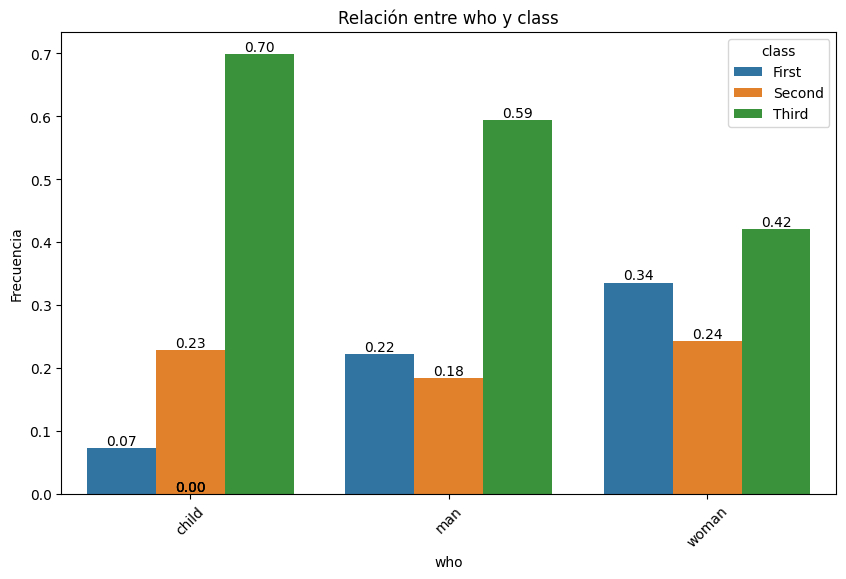

In [18]:

plot_categorical_relationship_fin(df_titanic,"who","class", relative_freq= True, show_values= True)


In [19]:
tabla_contingencia = pd.crosstab(df_titanic['class'], df_titanic['alive'])

print(tabla_contingencia)

print("        ")

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

alive    no  yes
class           
First    80  136
Second   97   87
Third   372  119
        
Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


#### 3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

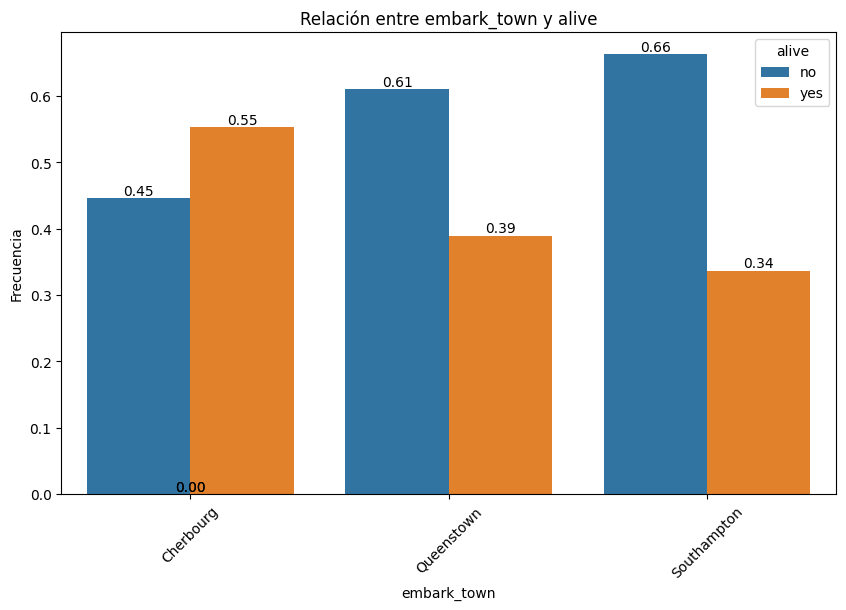

In [20]:
plot_categorical_relationship_fin(df_titanic,"embark_town","alive", relative_freq= True, show_values= True)

In [21]:
tabla_contingencia = pd.crosstab(df_titanic['embark_town'], df_titanic['alive'])

tabla_contingencia["%_no"] = (tabla_contingencia["no"] / 891 ) * 100

tabla_contingencia["%_yes"] = (tabla_contingencia["yes"] / 891) * 100

tabla_contingencia



alive,no,yes,%_no,%_yes
embark_town,,,,
Cherbourg,75,93,8.417508,10.437710
Queenstown,47,30,5.274972,3.367003
Southampton,427,217,47.923681,24.354658


In [22]:
tabla_contingencia = pd.crosstab(df_titanic['embark_town'], df_titanic['alive'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 26.48914983923762
P-Value: 1.769922284120912e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.7480315  64.2519685]
 [ 47.5511811  29.4488189]
 [397.7007874 246.2992126]]


#### 4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?


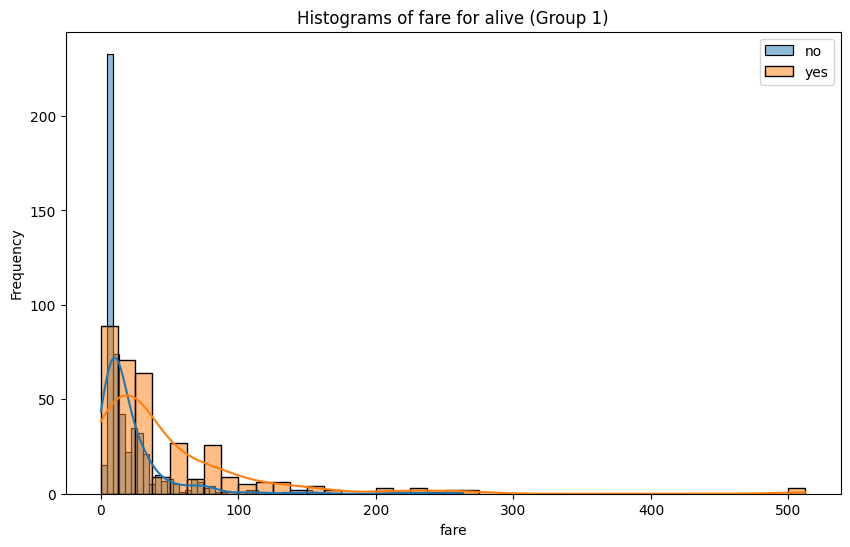

In [23]:
plot_grouped_histograms(df_titanic,"alive", "fare",20)

In [24]:
from scipy.stats import mannwhitneyu 

grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


In [25]:
from scipy import stats


grupos = df_titanic['alive'].unique()  # Obtener los valores únicos de la columna categórica, en este caso la compañía área
ingresos_por_company = [df_titanic[df_titanic['alive'] == grupo]['fare'] for grupo in grupos] # obtenemos los ingresos por compañía y los incluimos en una lista
ingresos_por_company

[0       7.2500
 4       8.0500
 5       8.4583
 6      51.8625
 7      21.0750
         ...   
 884     7.0500
 885    29.1250
 886    13.0000
 888    23.4500
 890     7.7500
 Name: fare, Length: 549, dtype: float64,
 1      71.2833
 2       7.9250
 3      53.1000
 8      11.1333
 9      30.0708
         ...   
 875     7.2250
 879    83.1583
 880    26.0000
 887    30.0000
 889    30.0000
 Name: fare, Length: 342, dtype: float64]

In [26]:
f_val, p_val = stats.f_oneway(*ingresos_por_company) # El método * (igual que cuando vimos *args hace mil años) 
                                                    # lo que hace es separar todos los elementos de la lista y pasarselos como argumento a la función
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 63.03076422804448
Valor p: 6.120189341921873e-15


#### 5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?


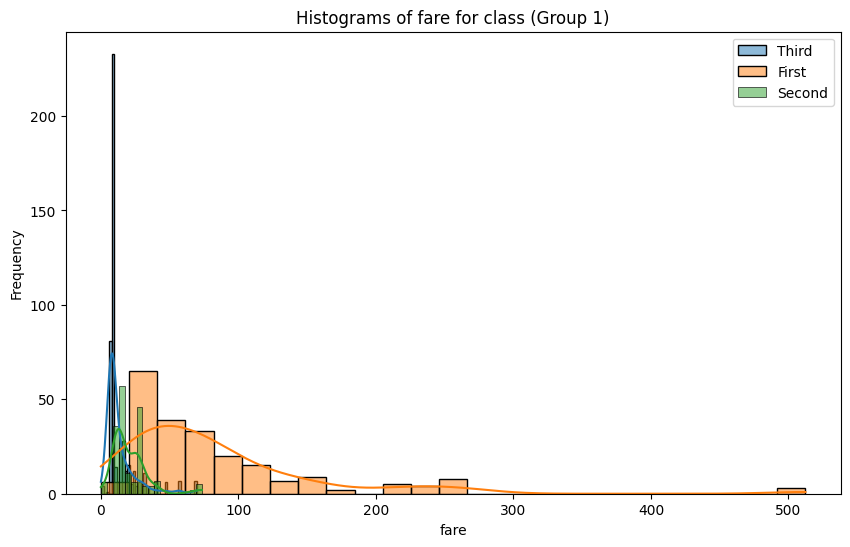

In [27]:
plot_grouped_histograms(df_titanic,"class", "fare",20)

In [28]:
gratis=df_titanic[df_titanic["fare"] == 0] 
gratis

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0


In [29]:
maxi = df_titanic["fare"].max()

df_titanic[df_titanic["fare"] == maxi] 

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?


In [30]:
grouped = pd.DataFrame(df_titanic.groupby(["class","age"])["alive"].value_counts())



8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [ ]:
col_directora = "alive"
col_1 = "fare"
col_2 = "age"
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

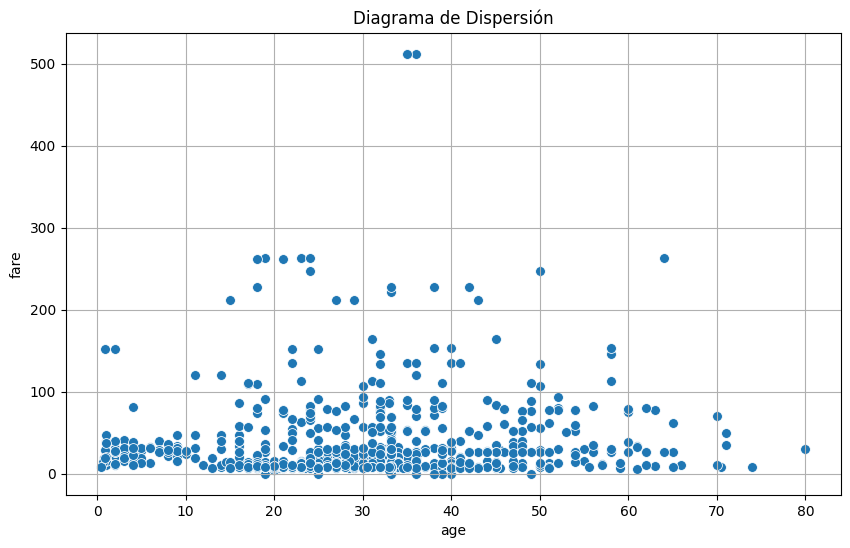

In [31]:
grafico_dispersion_con_correlacion(df_titanic,"age", "fare")

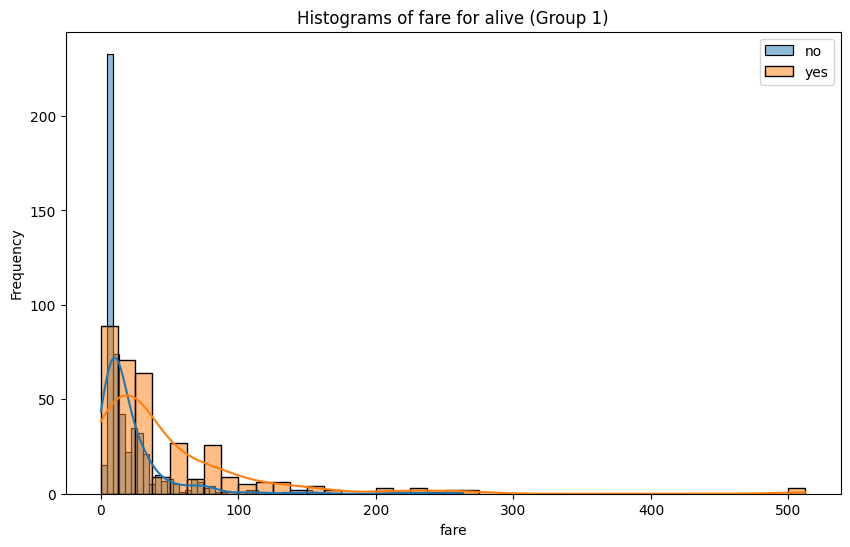

In [32]:
plot_grouped_histograms(df_titanic,"alive", "fare",20)

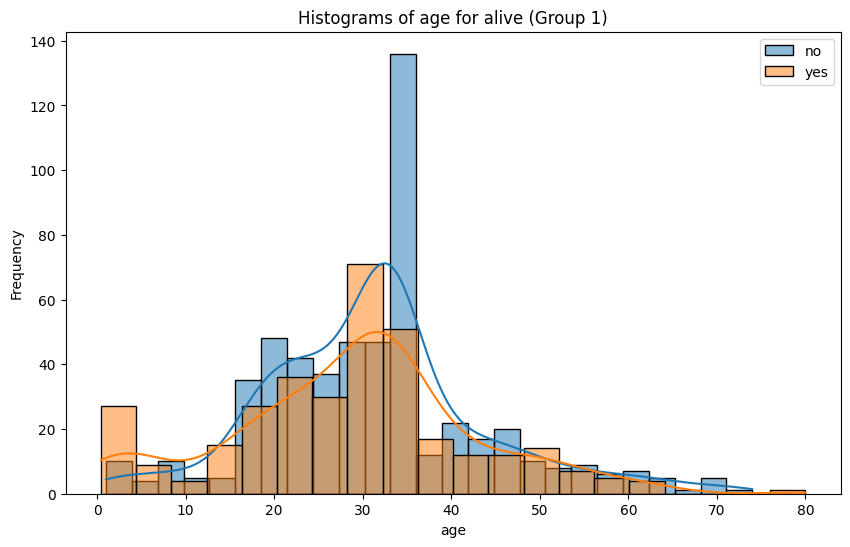

In [33]:
plot_grouped_histograms(df_titanic,"alive", "age",20)

In [34]:
from scipy.stats import mannwhitneyu 

grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["age"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["age"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 85493.5
Valor p: 0.024550133252544733


## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [35]:
df_air_june = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_air_june

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


In [36]:
df_air_june["aircompany"].value_counts()

aircompany
TabarAir      142
MoldaviAir    133
PamPangea     117
FlyQ          108
Airnar        100
Name: count, dtype: int64

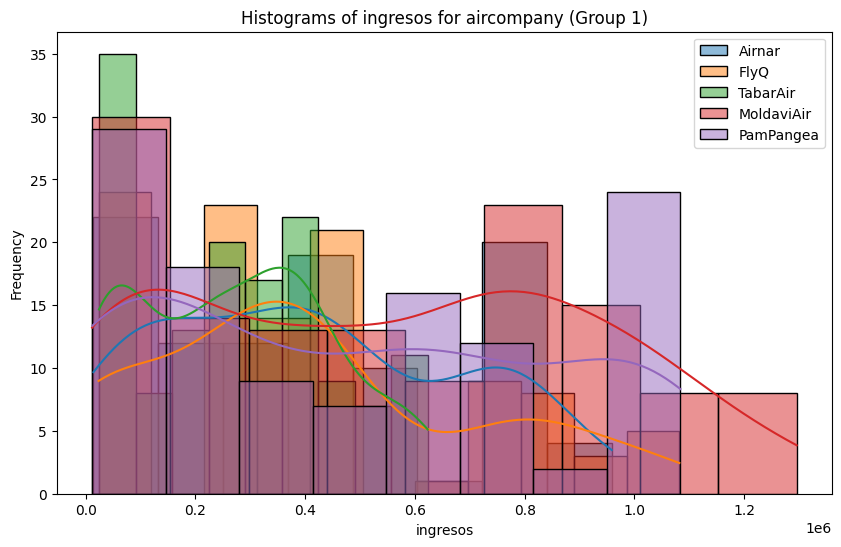

In [37]:
plot_grouped_histograms(df_air_june,"aircompany", "ingresos",20)

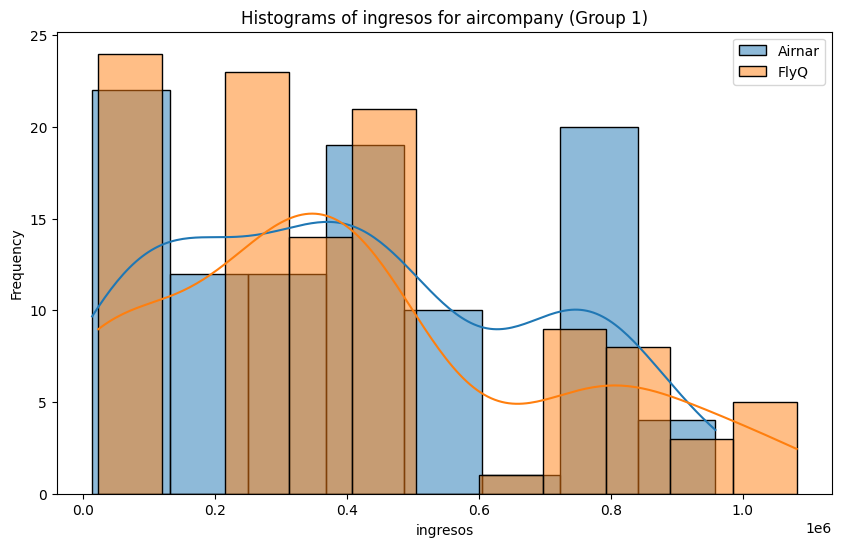

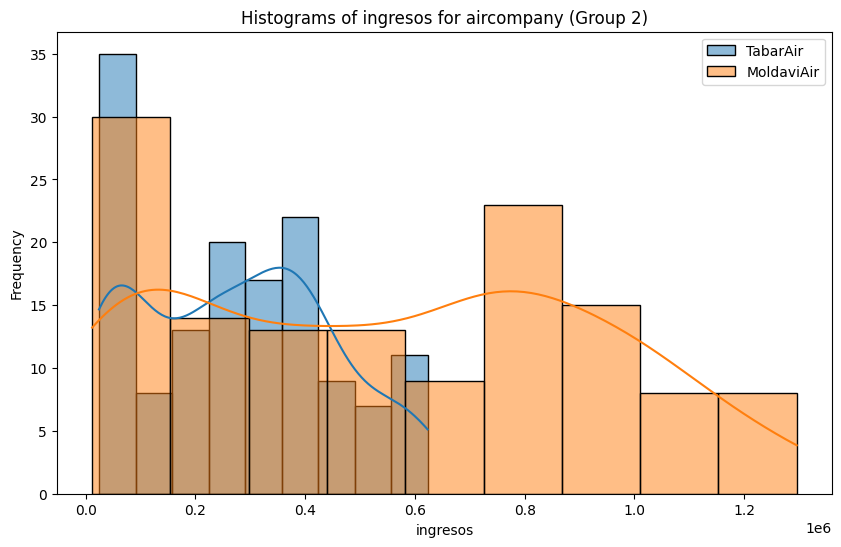

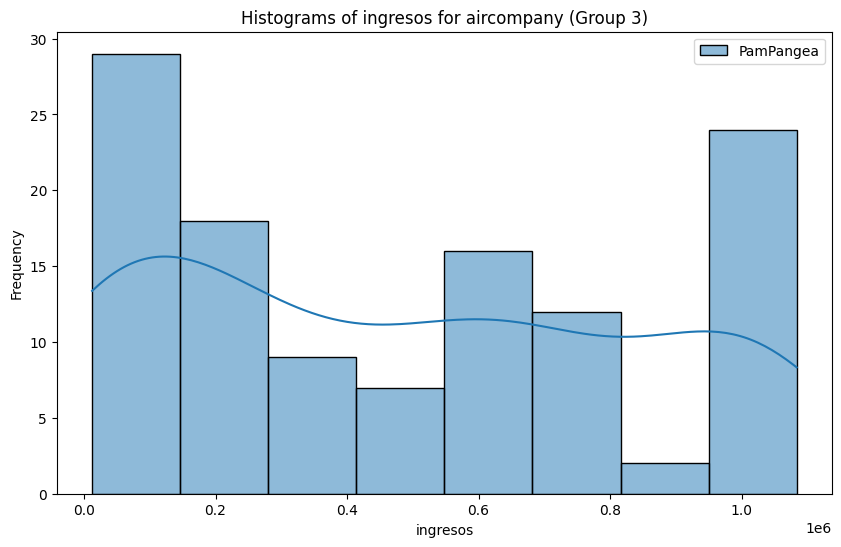

In [38]:
plot_grouped_histograms(df_air_june,"aircompany", "ingresos",2)

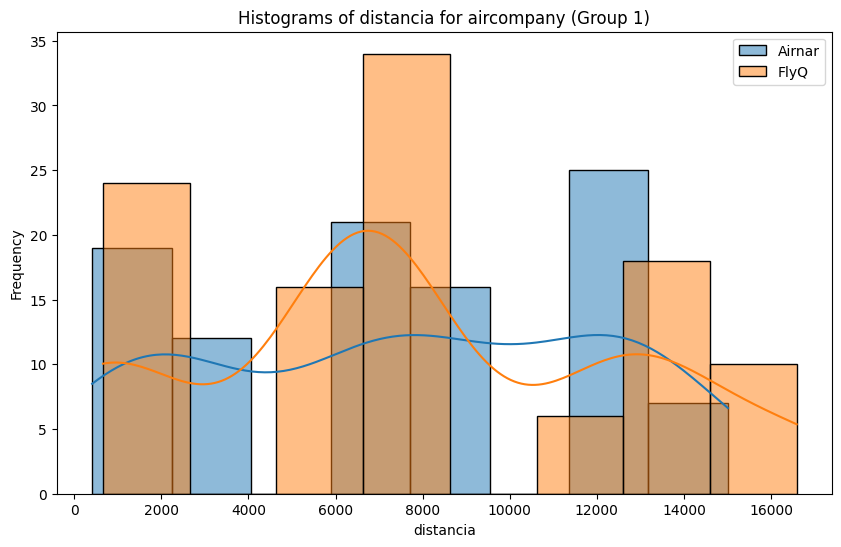

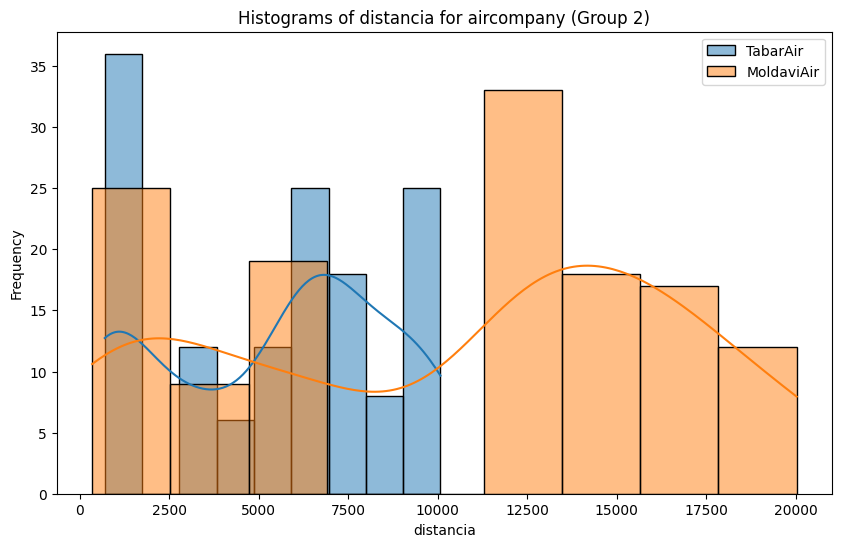

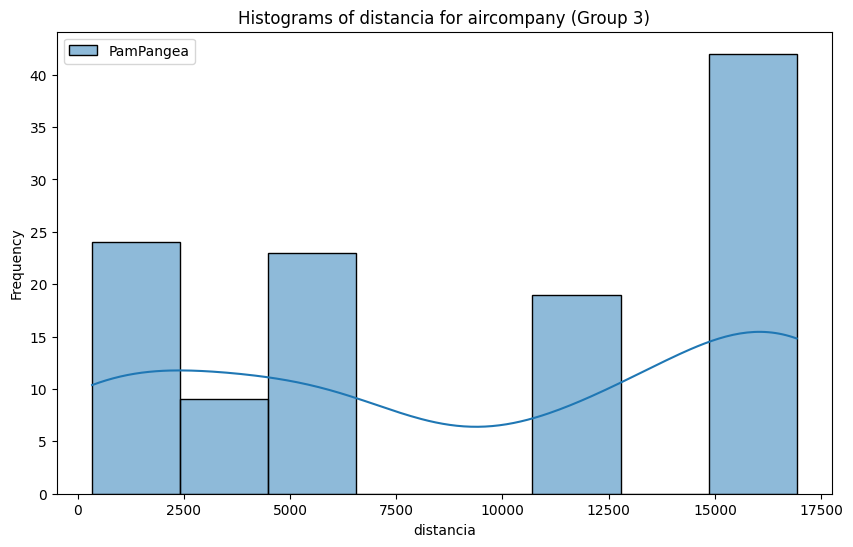

In [39]:
plot_grouped_histograms(df_air_june,"aircompany", "distancia",2)

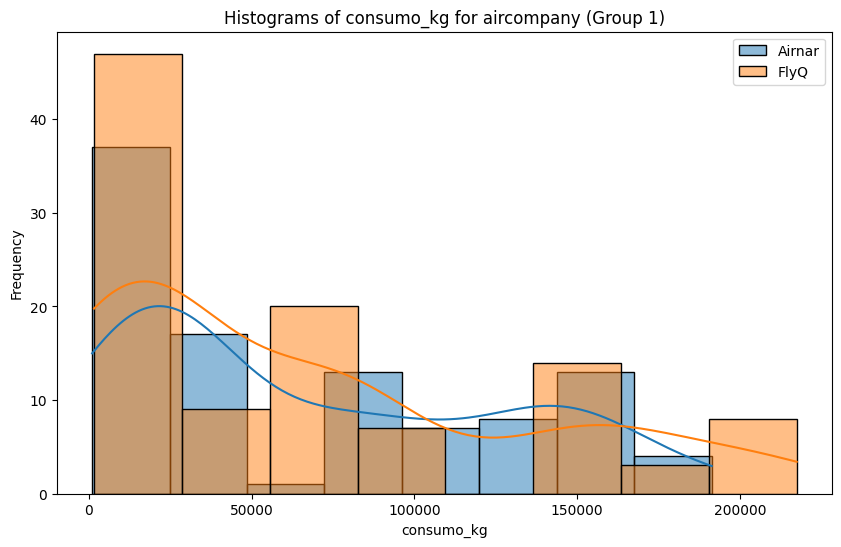

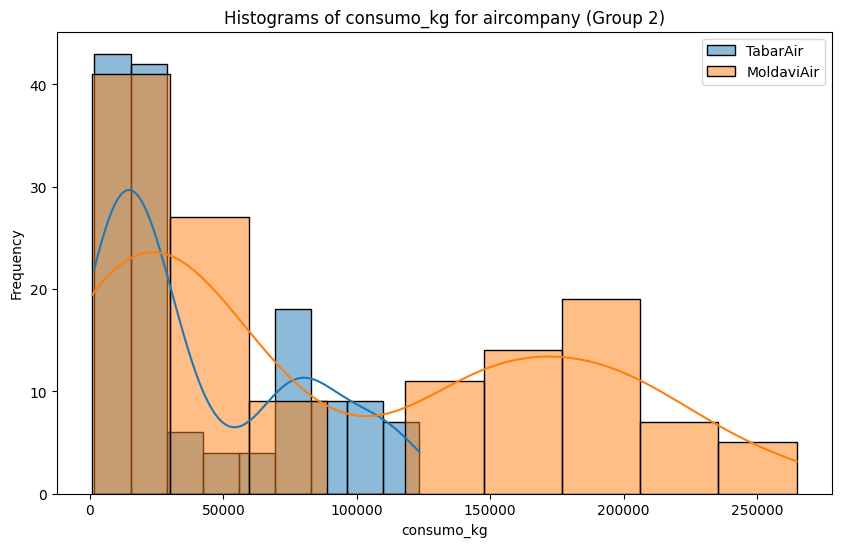

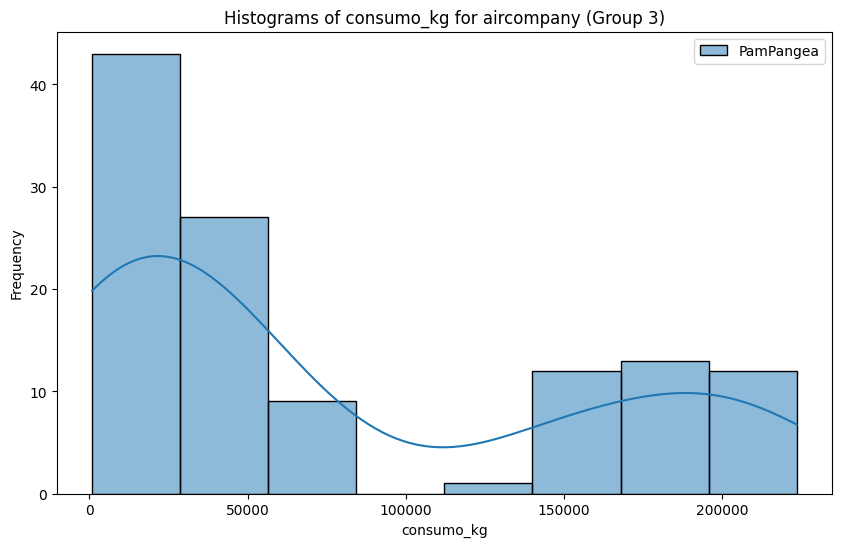

In [40]:
plot_grouped_histograms(df_air_june,"aircompany", "consumo_kg",2)


### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

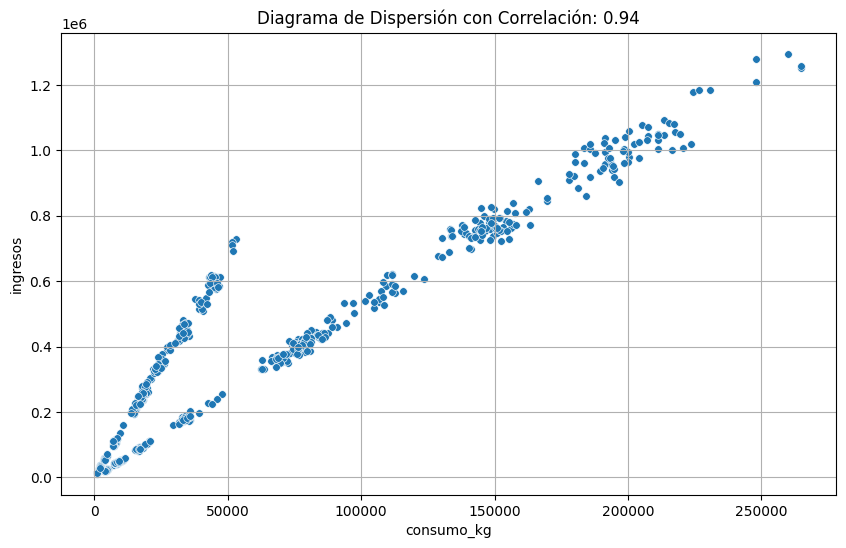

In [41]:
grafico_dispersion_con_correlacion(df_air_june,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)

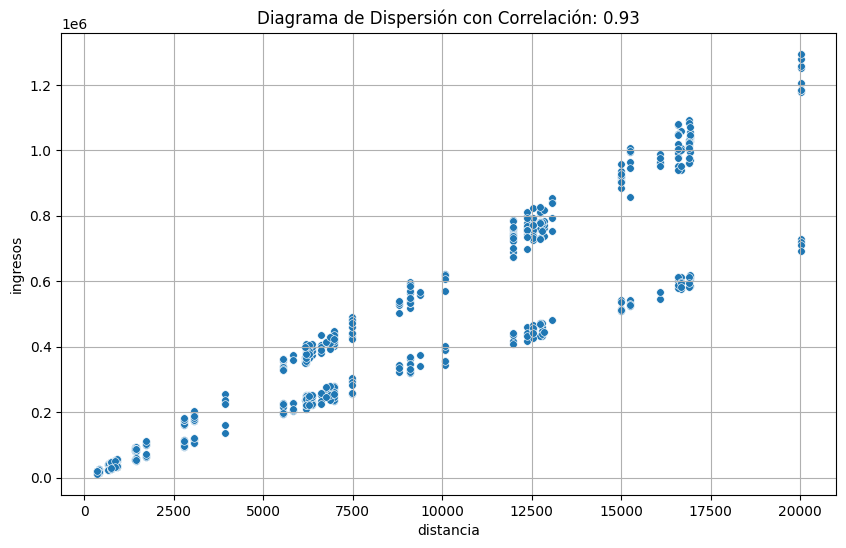

In [42]:
grafico_dispersion_con_correlacion(df_air_june,"distancia", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)

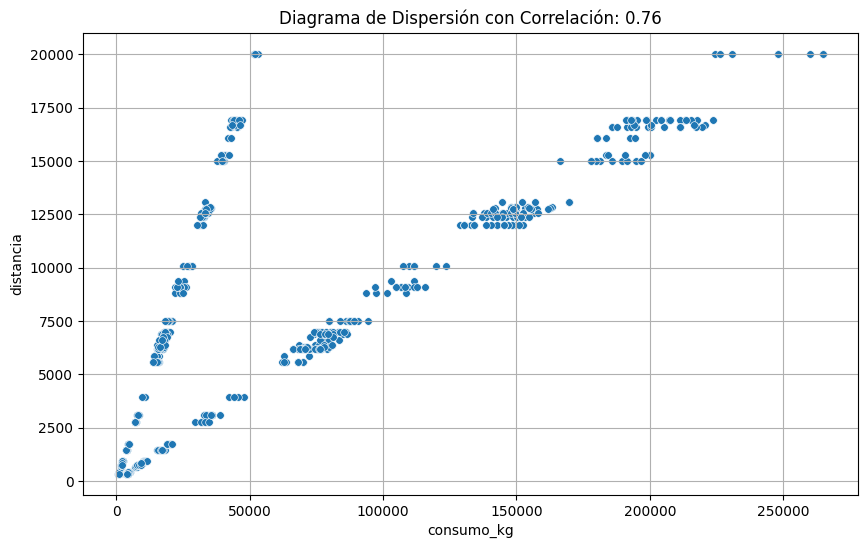

In [43]:
grafico_dispersion_con_correlacion(df_air_june,"consumo_kg", "distancia", mostrar_correlacion= True, tamano_puntos= 30)

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

<Axes: >

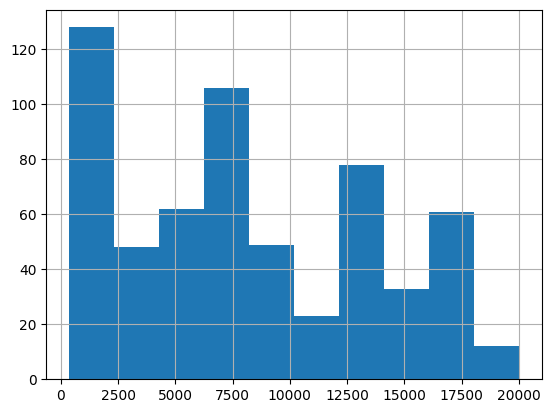

In [44]:
df_air_june.distancia.hist()

In [45]:
# Crear la nueva columna usando `np.select` o `pd.cut`
import numpy as np

# Condiciones para categorizar
condiciones = [
    (df_air_june["distancia"] < 5000),          # Baja distancia
    (df_air_june["distancia"] > 12500)          # Alta distancia
]

# Valores asociados a las condiciones
categorias = ["baja_distancia", "alta_distancia"]

# Asignar valores según las condiciones
df_air_june["cat_vuelo"] = np.select(condiciones, categorias, default="media_distancia")

df_air_june


,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,baja_distancia
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,alta_distancia
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,media_distancia
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,media_distancia
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,media_distancia
...,...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23,alta_distancia
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23,baja_distancia
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23,media_distancia
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23,alta_distancia


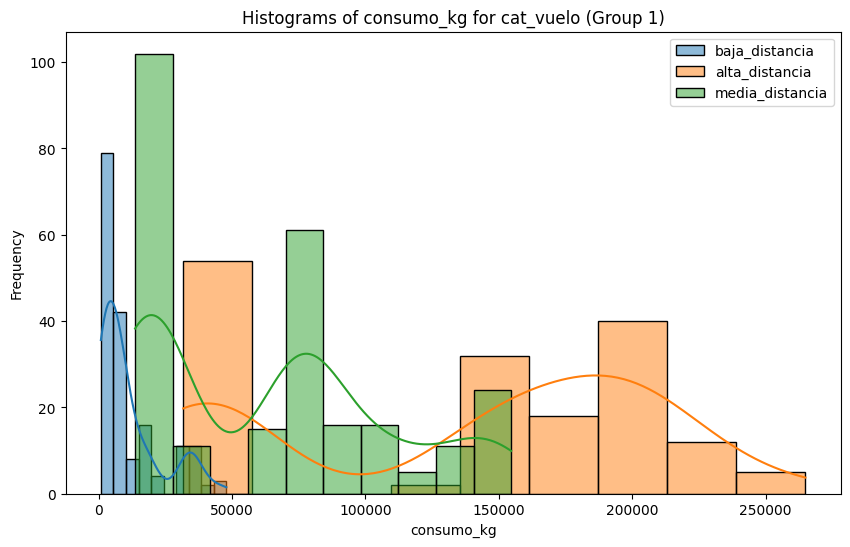

In [46]:

plot_grouped_histograms(df_air_june,"cat_vuelo", "consumo_kg",3)



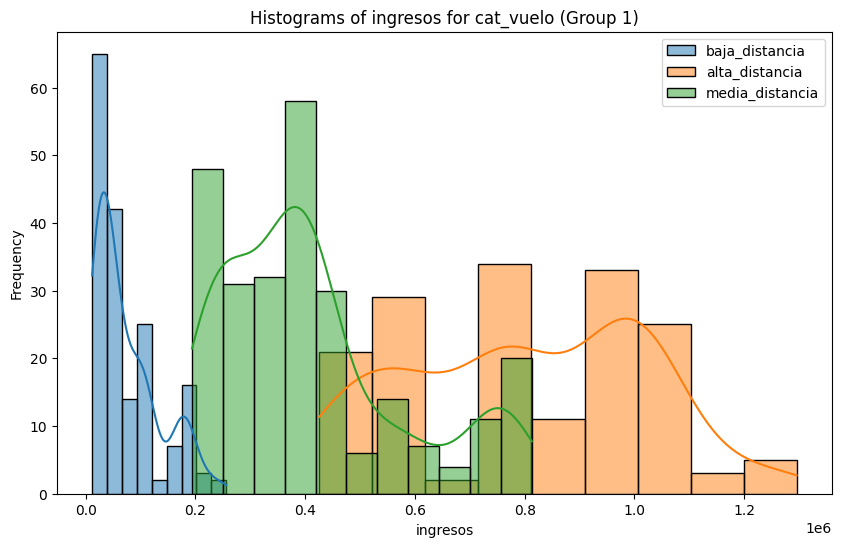

In [47]:

plot_grouped_histograms(df_air_june,"cat_vuelo", "ingresos",3)



### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.